### Exploratory Data Analysis / Data Summary
Lets take a look at the data to confirm total data and some basic stats

Some of the data might be irrelevant to the Thesis, such that champions picks and bans are not the focus of this analysis

In [367]:
import pandas as pd

# read in the csv
# data set source - https://www.kaggle.com/datasets/datasnaek/league-of-legends 
df = pd.read_csv('.\data\games.csv')

# confirm the dataframe
df.head()

# get the rows and columns of the df using shape
rows, columns = df.shape
print(f"rows {rows}, columns {columns}")    

rows 51490, columns 61


In [368]:
# Check the summary of the data
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


There are some negative values in t2_ban1 through t2_ban5

Will need to look into those values later

### Data Cleaning
Removing null or NaN values, correcting an data types

In [369]:

print("Any null values? ",df.isnull().any().describe() )
print("Any na values? ",df.isna().any().describe())


Any null values?  count        61
unique        1
top       False
freq         61
dtype: object
Any na values?  count        61
unique        1
top       False
freq         61
dtype: object


In [370]:
# Confirming via a sum count if anything is null
null_count = df.isnull().sum()

print("Null values per column:")
print(null_count)

Null values per column:
gameId          0
creationTime    0
gameDuration    0
seasonId        0
winner          0
               ..
t2_ban1         0
t2_ban2         0
t2_ban3         0
t2_ban4         0
t2_ban5         0
Length: 61, dtype: int64


No N/A , NaN , or null values found.
61 of 61 columns checked.

Seems this data was already cleaned prior to upload to Kaggle

### Data Transformation
The Champion json files need to be converted into Dataframe to later join them

In [371]:
# importing json to read the cross reference files
import json

# Load the first champion info JSON file
with open('.\data\champion_info.json') as f1:
    data1 = json.load(f1)

# Load the second champion info JSON file
with open('.\data\champion_info_2.json') as f2:
    data2 = json.load(f2)

# Convert JSON data to DataFrames
champion_df1 = pd.DataFrame(data1)
champion_df2 = pd.DataFrame(data2)

#show champion_df1
champion_df1.head()

,type,version,data
1,champion,7.17.2,"{'title': 'the Dark Child', 'id': 1, 'key': 'A..."
2,champion,7.17.2,"{'title': 'the Berserker', 'id': 2, 'key': 'Ol..."
3,champion,7.17.2,"{'title': 'the Colossus', 'id': 3, 'key': 'Gal..."
4,champion,7.17.2,"{'title': 'the Card Master', 'id': 4, 'key': '..."
5,champion,7.17.2,"{'title': 'the Seneschal of Demacia', 'id': 5,..."


Time to join the champion info data frames together to get them into a usable state

In [372]:
# Concatenate the DataFrames
combined_champion_df = pd.concat([champion_df1, champion_df2], ignore_index=True)

# Display the combined DataFrame
combined_champion_df

,type,version,data
0,champion,7.17.2,"{'title': 'the Dark Child', 'id': 1, 'key': 'A..."
1,champion,7.17.2,"{'title': 'the Berserker', 'id': 2, 'key': 'Ol..."
2,champion,7.17.2,"{'title': 'the Colossus', 'id': 3, 'key': 'Gal..."
3,champion,7.17.2,"{'title': 'the Card Master', 'id': 4, 'key': '..."
4,champion,7.17.2,"{'title': 'the Seneschal of Demacia', 'id': 5,..."
...,...,...,...
272,champion,7.18.1,"{'tags': ['Marksman', 'Mage'], 'title': 'the M..."
273,champion,7.18.1,"{'tags': ['Mage', 'Assassin'], 'title': 'the N..."
274,champion,7.18.1,"{'tags': ['Marksman', 'Fighter'], 'title': 'De..."
275,champion,7.18.1,"{'tags': ['Assassin', 'Mage'], 'title': 'the D..."


Convert the data in that data column into individual column for more usable data

In [373]:
# normalize the data to expand what it had in the data column
normal_champ_df = pd.json_normalize(combined_champion_df['data'])
normal_champ_df

,title,id,key,name,tags
0,the Dark Child,1,Annie,Annie,NaN
1,the Berserker,2,Olaf,Olaf,NaN
2,the Colossus,3,Galio,Galio,NaN
3,the Card Master,4,TwistedFate,Twisted Fate,NaN
4,the Seneschal of Demacia,5,XinZhao,Xin Zhao,NaN
...,...,...,...,...,...
272,the Mouth of the Abyss,96,KogMaw,Kog'Maw,"[Marksman, Mage]"
273,the Nine-Tailed Fox,103,Ahri,Ahri,"[Mage, Assassin]"
274,Demacia's Wings,133,Quinn,Quinn,"[Marksman, Fighter]"
275,the Deceiver,7,Leblanc,LeBlanc,"[Assassin, Mage]"


In [374]:
# checking some data types here to confirm the normalization
normal_champ_df.dtypes

title    object
id        int64
key      object
name     object
tags     object
dtype: object

Checking for NaN again. 

In [375]:
print("Any null values? ",normal_champ_df.isnull().any())
print("Any na values? ",normal_champ_df.isna().any())

Any null values?  title    False
id       False
key      False
name     False
tags      True
dtype: bool
Any na values?  title    False
id       False
key      False
name     False
tags      True
dtype: bool


We now have NaN values to handle, leaving the rest of the tags as a list is probably good though since they each contain multiple values typically.

We have some values to fix here, replacing them with empty strings

In [376]:
# replacing NaN values in the tags column of this second data set
normal_champ_df['tags'] = normal_champ_df['tags'].fillna("")

normal_champ_df

,title,id,key,name,tags
0,the Dark Child,1,Annie,Annie,
1,the Berserker,2,Olaf,Olaf,
2,the Colossus,3,Galio,Galio,
3,the Card Master,4,TwistedFate,Twisted Fate,
4,the Seneschal of Demacia,5,XinZhao,Xin Zhao,
...,...,...,...,...,...
272,the Mouth of the Abyss,96,KogMaw,Kog'Maw,"[Marksman, Mage]"
273,the Nine-Tailed Fox,103,Ahri,Ahri,"[Mage, Assassin]"
274,Demacia's Wings,133,Quinn,Quinn,"[Marksman, Fighter]"
275,the Deceiver,7,Leblanc,LeBlanc,"[Assassin, Mage]"


See if ID field is unique to replace index with the ID field

In [377]:
# Check if there are duplicate 'id' values
print("Duplicate values in 'id' field:",normal_champ_df['id'].duplicated().any())

# Show which are duplicates
normal_champ_df['id'].duplicated()

Duplicate values in 'id' field: True


0      False
1      False
2      False
3      False
4      False
       ...  
272     True
273     True
274     True
275     True
276     True
Name: id, Length: 277, dtype: bool

Selecting all the duplicate rows to view

In [378]:
duplicate_rows = normal_champ_df[normal_champ_df['id'].duplicated()]
duplicate_rows

,title,id,key,name,tags
139,the Monkey King,62,MonkeyKing,Wukong,"[Fighter, Tank]"
140,Grandmaster at Arms,24,Jax,Jax,"[Fighter, Assassin]"
141,the Harbinger of Doom,9,Fiddlesticks,Fiddlesticks,"[Mage, Support]"
142,the Demon Jester,35,Shaco,Shaco,[Assassin]
143,the Uncaged Wrath of Zaun,19,Warwick,Warwick,"[Fighter, Tank]"
...,...,...,...,...,...
272,the Mouth of the Abyss,96,KogMaw,Kog'Maw,"[Marksman, Mage]"
273,the Nine-Tailed Fox,103,Ahri,Ahri,"[Mage, Assassin]"
274,Demacia's Wings,133,Quinn,Quinn,"[Marksman, Fighter]"
275,the Deceiver,7,Leblanc,LeBlanc,"[Assassin, Mage]"


Checking total rows of each json file

In [379]:
rows, columns = champion_df1.shape
print(f"json 1 has rows {rows}, columns {columns}")
rows, columns = champion_df2.shape
print(f"json 2 has rows {rows}, columns {columns}")

json 1 has rows 138, columns 3
json 2 has rows 139, columns 3


So json 2 has one more row, and looking the head for json 2, thats because it just carries a empty record reference

In [380]:
champion_df2.head()

,type,version,data
None,champion,7.18.1,"{'tags': [], 'title': 'None', 'id': -1, 'key':..."
MonkeyKing,champion,7.18.1,"{'tags': ['Fighter', 'Tank'], 'title': 'the Mo..."
Jax,champion,7.18.1,"{'tags': ['Fighter', 'Assassin'], 'title': 'Gr..."
Fiddlesticks,champion,7.18.1,"{'tags': ['Mage', 'Support'], 'title': 'the Ha..."
Shaco,champion,7.18.1,"{'tags': ['Assassin'], 'title': 'the Demon Jes..."


So we only need to take champion_df1 into a dataframe instead of both and normalize it

In [381]:
# reset the dataframe we want with just the one json file
normal_champ_df = pd.json_normalize(champion_df1['data'])
normal_champ_df.head()

,title,id,key,name
0,the Dark Child,1,Annie,Annie
1,the Berserker,2,Olaf,Olaf
2,the Colossus,3,Galio,Galio
3,the Card Master,4,TwistedFate,Twisted Fate
4,the Seneschal of Demacia,5,XinZhao,Xin Zhao


In [382]:
# print out rows and columns
rows, columns = normal_champ_df.shape
print(f"normal_champ_df has rows {rows}, columns {columns}")

normal_champ_df has rows 138, columns 4


In [383]:
# confirming count == unique values here
normal_champ_df.describe()

,id
count,138.000000
mean,108.666667
std,111.363634
min,1.000000
25%,35.250000
50%,78.500000
75%,126.750000
max,516.000000


Now replacing the index of the data frame with the ID 

In [384]:
normal_champ_df.set_index('id', inplace=True)
normal_champ_df

,title,key,name
id,,,
1,the Dark Child,Annie,Annie
2,the Berserker,Olaf,Olaf
3,the Colossus,Galio,Galio
4,the Card Master,TwistedFate,Twisted Fate
5,the Seneschal of Demacia,XinZhao,Xin Zhao
...,...,...,...
429,the Spear of Vengeance,Kalista,Kalista
432,the Wandering Caretaker,Bard,Bard
497,The Charmer,Rakan,Rakan


We don't really need to remove key or name, though that could make sense here but sense this is just going to be a cross reference dataframe for filling in the data set, this should be fine.

Data Transformation is done. 

### Data joining
Joining champions names to their values in the data (number)
joining Summoner spell info to the data frame

In [385]:
# Create a mapping dictionary from normal_champ_df (index -> Name)
champion_mapping = normal_champ_df['name'].to_dict()

# confirm the first 5 values in the mapping
print(list(champion_mapping.items())[:5])

[(1, 'Annie'), (2, 'Olaf'), (3, 'Galio'), (4, 'Twisted Fate'), (5, 'Xin Zhao')]


Creating a list of all the columns that need to be cross referenced and replaced

In [386]:
champion_columns = ["t1_champ1id","t1_champ2id","t1_champ3id","t1_champ4id","t1_champ5id", # team 1 champion ids
                    "t2_champ1id","t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id", # team 2 champion ids
                    "t1_ban1","t1_ban2","t1_ban3","t1_ban4","t1_ban5",   # team 1 ban ids
                    "t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5", ] # team 2 ban ids

Rather than replacing the champion ID, adding a column makes more sense in case I need to reference it my number later

In [387]:
# for each column in the champion_columns list
for column in champion_columns:

    # Replace the values in the column of df based on the mapping
    df[column+"name"] = df[column].map(champion_mapping)

# check that that the columns have been added
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_ban1name,t1_ban2name,t1_ban3name,t1_ban4name,t1_ban5name,t2_ban1name,t2_ban2name,t2_ban3name,t2_ban4name,t2_ban5name
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Caitlyn,Darius,Teemo,Xayah,Warwick,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Lulu,Janna,Twitch,Soraka,Blitzcrank,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Zed,Vayne,Ornn,Fiora,Cho'Gath,Camille,Tristana,Kayn,Janna,Caitlyn
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,Garen,Master Yi,Braum,Darius,Tristana


### analysis
 
A Typical metric that in shown in League of Legends data:
1. Champion win rate (if pick what is the chance of the team winning)

Also I will be exploring data about:
1. First Inhibitor win-rate
2. First Baron win-rate
3. First Dragon win-rate

To see these are correlated

----------------------
Looking at the head of these columns we want to look at.

1 means team 1 achieved that goal

2 means team 2 achieved that goal

Same for winning, 1 for team 1 or 2 for team 2

In [388]:
# taking at look at additional columns for analysis
df[['firstInhibitor', 'firstBaron', 'firstDragon', 'winner']].head()

,firstInhibitor,firstBaron,firstDragon,winner
0,1,1,1,1
1,1,0,1,1
2,1,1,2,1
3,1,1,1,1
4,1,1,1,1


Taking a look at distribution

In [389]:
# distribution of the winner column
print(df['winner'].value_counts())
df[['firstInhibitor', 'firstBaron', 'firstDragon']].apply(pd.Series.value_counts)

winner
1    26077
2    25413
Name: count, dtype: int64


,firstInhibitor,firstBaron,firstDragon
0,6276,20258,2000
1,23054,14758,24690
2,22160,16474,24800


Looking at this there are some zero values in there but we don't have any details on what that means, it could be a tie. I would assume forfeits are where the winner is one team but the column is 0. Which would be valid, but likely not provide an good insight. So we are going to remove all 0 values in these columns

In [390]:
filtered_df = df[(df['winner'] != 0) & 
                 (df['firstInhibitor'] != 0) & 
                 (df['firstBaron'] != 0) & 
                 (df['firstDragon'] != 0)]


In [391]:
# Contingency table for 'firstInhibitor' and 'winner'
first_inhibitor_winner = pd.crosstab(filtered_df['firstInhibitor'], filtered_df['winner'])
print(first_inhibitor_winner)

winner              1      2
firstInhibitor              
1               13065   2031
2                1844  13607


Doing a Chi-test to check correlation. Chi-test is meant for categorical data and these columns are basically a 'win' or 'lose' boolean variable

In [392]:
from scipy.stats import chi2_contingency

# creating a list of metrics to check for correlation

metrics = ['firstInhibitor', 'firstBaron', 'firstDragon']

# for each metric in the metrics list
for metric in metrics:

    # Contingency table for the metric and 'winner'
    # see how many of each category won
    metric_winner = pd.crosstab(filtered_df[metric], filtered_df['winner'])
    print(metric_winner)

    # Chi-Square test
    chi2, p, dof, expected = chi2_contingency(metric_winner)
    print(f"Chi-Square Value: {chi2}, p-value: {p}")

winner              1      2
firstInhibitor              
1               13065   2031
2                1844  13607
Chi-Square Value: 17009.58903069536, p-value: 0.0
winner          1      2
firstBaron              
1           11686   2757
2            3223  12881
Chi-Square Value: 11298.879406333654, p-value: 0.0
winner          1      2
firstDragon             
1            9352   5581
2            5557  10057
Chi-Square Value: 2231.988328837162, p-value: 0.0


All of the metrics have a p-value less than 0.05, so we can reject the null hypothesis that the metrics are independent of the winner. This means that the metrics are correlated with the winner.

### Data Visualization

In [393]:
# import graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt

Heres some basic graphs to list who won based off who got the first inhibitor, first baron, first dragon

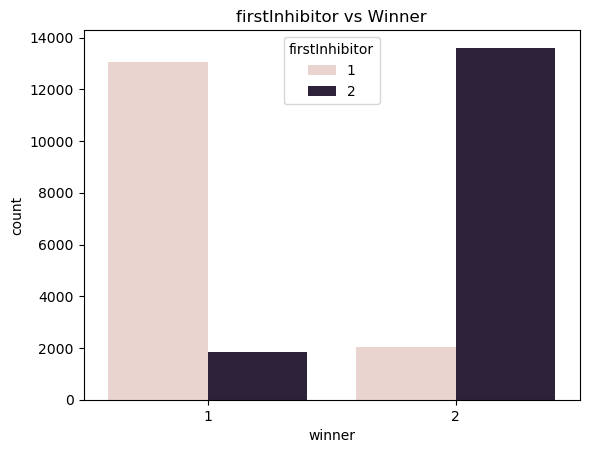

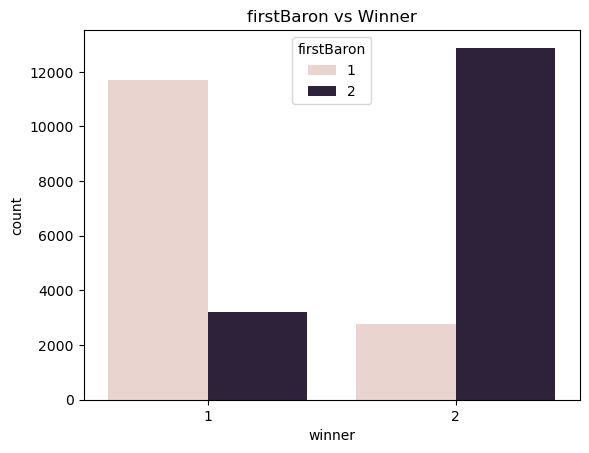

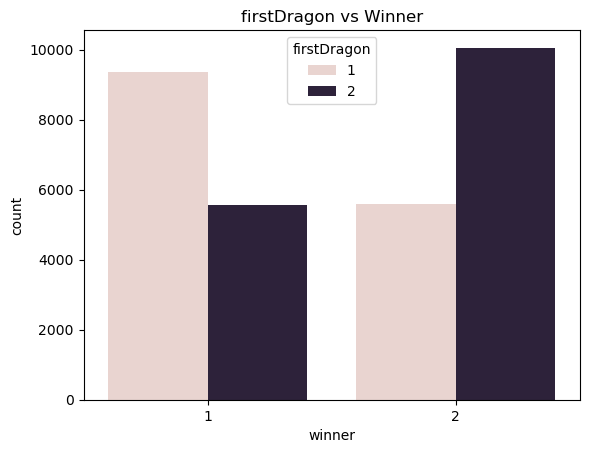

In [394]:

# for each metric in the metrics list
for metric in metrics:

    # graph the data
    sns.countplot(x='winner', hue=metric, data=filtered_df)
    plt.title(f"{metric} vs Winner")
    plt.show()

Lets compare what is the most meaningful for players to focus on by checking win percentages for these metrics

In [403]:
percentages = {}

# for each metric in the metrics list
for metric in metrics:
    # calc win probability
    
    # Calculate total occurrences for each team (1 and 2)
    counts = df[metric].value_counts()

    # Calculate wins where the metric aligns with the 'winner'
    wins = df[df[metric] == df['winner']][metric].value_counts()

    # Compute win percentage
    win_percentage = (wins / counts) * 100

    print(win_percentage)
    percentages[metric] = win_percentage
    

firstInhibitor
0          NaN
1    90.869263
2    91.344765
Name: count, dtype: float64
firstBaron
0          NaN
1    81.162759
2    80.241593
Name: count, dtype: float64
firstDragon
0          NaN
1    68.598623
2    67.467742
Name: count, dtype: float64


### Aggreagation
Create a pivot table